# Prédictions des émissions de CO2 de bâtiments non destinés à l’habitation

## SOMMAIRE

### 1. Chargement des données

- Importation des librairies

- Retrait de "ENERGY STAR Score" du dataset 

### 2. Prédictions des modèles sans " ENERGYSTARScore "

### 2.1. Modèles linéaires

- Utilisons la méthode de validation croisée << GridsearchCV >> pour optimiser les paramètres du <span style="color: blue;">modèle Dummy Regressor</span> 

- Utilisons la méthode de validation croisée << GridsearchCV >> pour optimiser les paramètres du <span style="color: blue;">modèle Ridge</span> 

- Utilisons la méthode de validation croisée << GridsearchCV >> pour optimiser les paramètres du <span style="color: blue;">modèle Lasso</span> 

- Tableau récapitulatif des modèles linéaires

### 2.2. Modèles non-linéaires

- <span style="color: blue;">Régression ridge à noyau</span> 

- <span style="color: blue;">Random Forest Regressor</span> 

- <span style="color: blue;">Gradient boosting</span> 

- Tableau récapitulatif des modèles non-linéaires

### 2.3. Tableau récapitulatif de l'ensemble des modèles

### 2.4. Feature importance sans "ENERGYSTARScore"

- Feature importance globale

- Feature importance locale

## 3. Prédictions des modèles avec " ENERGYSTARScore "

- Réintroduction de de la variable "ENERGYSTARScore" dans le dataset

- Créer un sous-ensemble du dataset avec les bâtiments ayant une valeur de l’EnergyStarScore non nulle

### 3.1. Modèles linéaires

- Utilisons la méthode de validation croisée << GridsearchCV >> pour optimiser les paramètres du <span style="color: blue;">modèle Dummy Regressor</span> 

- Utilisons la méthode de validation croisée << GridsearchCV >> pour optimiser les paramètres du <span style="color: blue;">modèle Ridge</span> 

- Utilisons la méthode de validation croisée << GridsearchCV >> pour optimiser les paramètres du <span style="color: blue;">modèle Ridge</span> 

- Tableau récapitulatif des modèles linéaires

### 3.2. Modèles non-linéaires

- <span style="color: blue;">Régression ridge à noyau</span> 

- <span style="color: blue;">Random Forest Regressor</span> 

- <span style="color: blue;">Gradient boosting</span> 

- Tableau récapitulatif des modèles non-linéaires

### 3.3. Tableau récapitulatif de l'ensemble des modèles

### 3.4. Feature importance sans "ENERGYSTARScore"

- Feature importance globale

- Feature importance locale

## 4. Conclusion

### 1. Chargement des données

- Importation des librairies

In [1]:
# Importation des librairies
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import linear_model

from sklearn.dummy import DummyRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from sklearn.linear_model import LinearRegression, Ridge, Lasso

from sklearn import model_selection
from sklearn import kernel_ridge
from sklearn.kernel_ridge import KernelRidge
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, make_scorer
from sklearn.ensemble import GradientBoostingRegressor
import timeit
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
import shap

In [2]:
# Chargement des données
building_df_cleaned = pd.read_csv('./data/building_df_retained.csv', low_memory = False)
building_df_cleaned

,Latitude,Longitude,NumberofFloors,PropertyGFATotal,ENERGYSTARScore,SiteEUIWN(kBtu/sf),GHGEmissionsIntensity,BuildingAge,TotalUseTypeNumber,GFABuildingRate,GFAParkingRate,BuildingType_encoded,PrimaryPropertyType_encoded,Neighborhood_encoded,LargestPropertyUseType_encoded,ComplianceStatus_encoded,BuildingAge_Group_encoded
0,47.61220,-122.33799,12,88434,60.0,84.300003,2.83,89,1,1.00,0.00,1,2,6,13,0,8
1,47.61317,-122.33393,11,103566,61.0,97.900002,2.86,20,3,0.85,0.15,1,2,6,13,0,2
2,47.61393,-122.33810,41,956110,43.0,97.699997,2.19,47,1,0.79,0.21,1,2,6,13,0,4
3,47.61412,-122.33664,10,61320,56.0,113.300003,4.67,90,1,1.00,0.00,1,2,6,13,0,9
4,47.61375,-122.34047,18,175580,75.0,118.699997,2.88,36,3,0.65,0.35,1,2,6,13,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1646,47.56722,-122.31154,1,12294,46.0,76.699997,1.70,26,1,1.00,0.00,2,9,9,24,0,2
1647,47.59625,-122.32283,1,16000,NaN,65.900002,2.01,12,1,1.00,0.00,2,10,6,31,0,1
1648,47.63644,-122.35784,1,13157,NaN,460.100006,16.99,42,3,1.00,0.00,2,10,11,31,0,4
1649,47.52832,-122.32431,1,14101,NaN,55.500000,1.57,27,5,1.00,0.00,2,8,9,31,0,2


- Retrait de "ENERGY STAR Score" du dataset 

In [3]:
# Le dataset sans la variable "ENERGY STAR Score"
columns = ['Latitude', 'Longitude', 'NumberofFloors', 'PropertyGFATotal', 'BuildingAge', 'TotalUseTypeNumber', 'GFABuildingRate', 
           'GFAParkingRate', 'BuildingType_encoded', 'PrimaryPropertyType_encoded', 'Neighborhood_encoded', 'LargestPropertyUseType_encoded', 
           'ComplianceStatus_encoded','BuildingAge_Group_encoded', 'SiteEUIWN(kBtu/sf)', 'GHGEmissionsIntensity']
df_without_score = building_df_cleaned[columns]
df_without_score

,Latitude,Longitude,NumberofFloors,PropertyGFATotal,BuildingAge,TotalUseTypeNumber,GFABuildingRate,GFAParkingRate,BuildingType_encoded,PrimaryPropertyType_encoded,Neighborhood_encoded,LargestPropertyUseType_encoded,ComplianceStatus_encoded,BuildingAge_Group_encoded,SiteEUIWN(kBtu/sf),GHGEmissionsIntensity
0,47.61220,-122.33799,12,88434,89,1,1.00,0.00,1,2,6,13,0,8,84.300003,2.83
1,47.61317,-122.33393,11,103566,20,3,0.85,0.15,1,2,6,13,0,2,97.900002,2.86
2,47.61393,-122.33810,41,956110,47,1,0.79,0.21,1,2,6,13,0,4,97.699997,2.19
3,47.61412,-122.33664,10,61320,90,1,1.00,0.00,1,2,6,13,0,9,113.300003,4.67
4,47.61375,-122.34047,18,175580,36,3,0.65,0.35,1,2,6,13,0,3,118.699997,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1646,47.56722,-122.31154,1,12294,26,1,1.00,0.00,2,9,9,24,0,2,76.699997,1.70
1647,47.59625,-122.32283,1,16000,12,1,1.00,0.00,2,10,6,31,0,1,65.900002,2.01
1648,47.63644,-122.35784,1,13157,42,3,1.00,0.00,2,10,11,31,0,4,460.100006,16.99
1649,47.52832,-122.32431,1,14101,27,5,1.00,0.00,2,8,9,31,0,2,55.500000,1.57


## 2. Prédictions des modèles sans << ENERGYSTARScore >>

### 2.1. Modèles linéaires

In [4]:
# Créer des objets X et y qui séparent les variables d'entrée (X) de la variable cible (y) dans le cadre de la modélisation prédictive.
X = df_without_score.drop(columns = 'GHGEmissionsIntensity')
y = df_without_score['GHGEmissionsIntensity']

In [5]:
# Normalisation de mes données
std_scale = preprocessing.StandardScaler().fit(X)
X_train_std = std_scale.transform(X)
#X_test_std = std_scale.transform(X_test)

On sépare ensuite le jeu de données en données d'entraînement et données test

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_train_std, y, test_size=0.3, random_state = 42)

In [8]:
X_train.shape

(1155, 15)

In [9]:
X_test.shape

(496, 15)

In [7]:
# Importation des bibliothèques
import pandas as pd
from sklearn.metrics import accuracy_score
import joblib
import evidently
from evidently.dashboard import Dashboard
from evidently.tabs import DataDriftTab

# Chargement du modèle
model = joblib.load("best_logistic_regression_model.joblib")

# Prédictions sur l'ensemble de test
predictions = model.predict(X_test)

# 1. Analyse de Data Drift
data_drift_report = Dashboard(tabs=[DataDriftTab])
data_drift_report.calculate(X_train, X_test, column_mapping=None)
data_drift_report.show()

# 2. Stockage d'événements et gestion d'alertes (exemple avec une simple métrique)
precision = accuracy_score(y_test, predictions)
if precision < 0.7:
    print("La précision du modèle a baissé en dessous de 70%. Envoyer une alerte ici.")

# 3. Analyse de la stabilité du modèle dans le temps (exemple avec une simple métrique)
# ... (examiner les performances du modèle sur des intervalles réguliers)

# 4. Analyse de Data Drift avec Evidently HTML Tableau
drift_dashboard = Dashboard(tabs=[DataDriftTab])
drift_dashboard.calculate(X_train, X_test, column_mapping=None)
drift_dashboard.save("data_drift_report.html")

ModuleNotFoundError: No module named 'evidently.dashboard'

- Utilisons la méthode de validation croisée << GridsearchCV >> pour optimiser les paramètres du <span style="color: blue;">modèle Dummy Regressor</span> 

Meilleurs paramètres : {'quantile': 0.25, 'strategy': 'mean'}
RMSE : 2.151575843717634
R2 : -4.099973964177828e-05
MAE : 1.3566275130437944


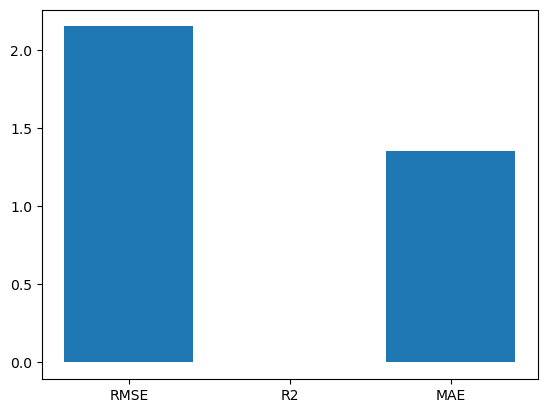

In [9]:
# Définition des paramètres à tester
param_grid = {'strategy': ['mean', 'median', 'quantile'], 'quantile': [0.25, 0.5, 0.75]}

# Création du modèle
dummy = DummyRegressor()

# Validation croisée
grid_search = GridSearchCV(dummy, param_grid=param_grid, cv=5, scoring=['neg_mean_squared_error', 'r2', 'neg_mean_absolute_error'], refit='r2')
grid_search.fit(X_train, y_train)

# Prédiction sur l'ensemble de validation avec les meilleurs paramètres
best_dummy = grid_search.best_estimator_
y_pred = best_dummy.predict(X_test)

# Calcul de la RMSE, du R2 et du MAE sur l'ensemble de validation
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Affichage des résultats
print('Meilleurs paramètres :', grid_search.best_params_)
print('RMSE :', rmse)
print('R2 :', r2)
print('MAE :', mae)

# Représentation graphique des résultats
fig, ax = plt.subplots()
ax.bar(['RMSE', 'R2', 'MAE'], [rmse, r2, mae])
plt.show()

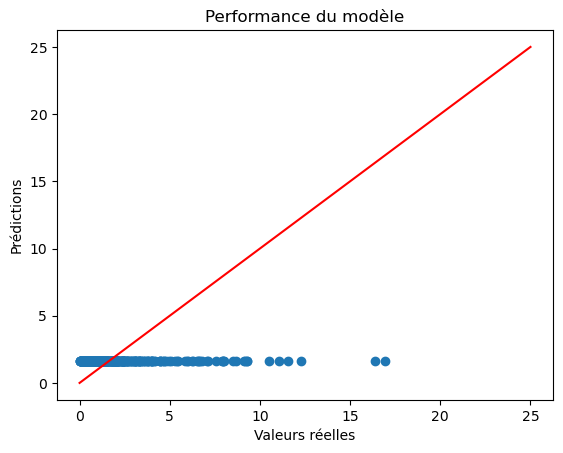

In [10]:
plt.scatter(y_test, y_pred)
plt.plot([0, 25], [0, 25], 'r')
plt.xlabel('Valeurs réelles')
plt.ylabel('Prédictions')
plt.title('Performance du modèle')
plt.show()

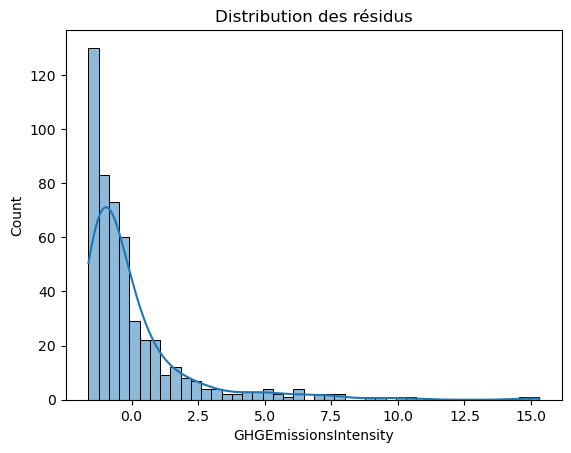

In [11]:
residus = y_test - y_pred
sns.histplot(residus, kde=True)
plt.title("Distribution des résidus")
plt.show()

- Utilisons la méthode de validation croisée << GridsearchCV >> pour optimiser les paramètres du <span style="color: blue;">modèle Ridge</span> 

Meilleurs paramètres : {'alpha': 10}
RMSE : 1.4077884033642811
R2 : 0.5718664588685702
MAE : 0.7780618630067165


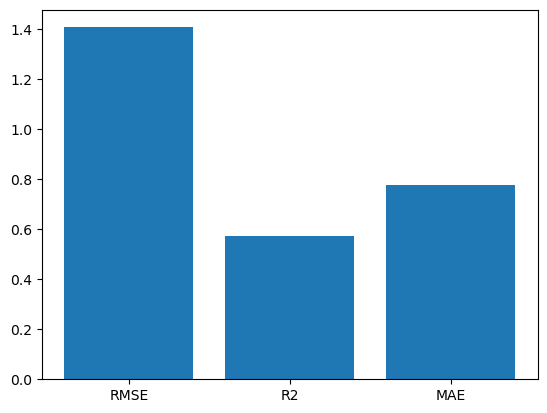

In [16]:
# Création du modèle Ridge
ridge_model = Ridge()

# Définition de la grille de paramètres à tester
param_grid = {'alpha': [0.1, 1, 10, 100]}

# Utilisation de GridSearchCV pour tester les paramètres
grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = grid_search.predict(X_test)

# Calcul de la RMSE sur l'ensemble de test
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Affichage des résultats
print('Meilleurs paramètres :', grid_search.best_params_)
print('RMSE :', rmse)
print('R2 :', r2)
print('MAE :', mae)

# Représentation graphique des résultats
fig, ax = plt.subplots()
ax.bar(['RMSE', 'R2', 'MAE'], [rmse, r2, mae])
plt.show()

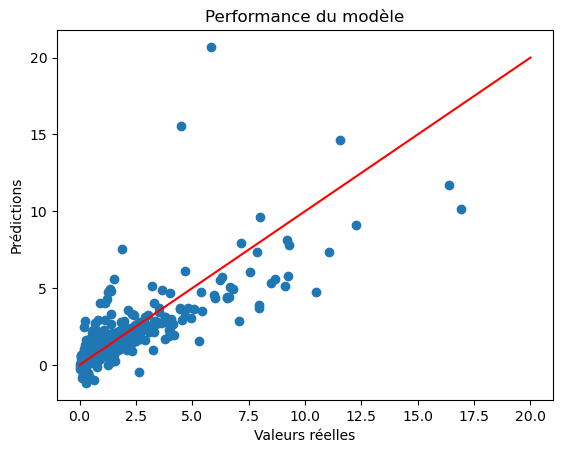

In [19]:
plt.scatter(y_test, y_pred)
plt.plot([0, 20], [0,20], 'r')
plt.xlabel('Valeurs réelles')
plt.ylabel('Prédictions')
plt.title('Performance du modèle')
plt.show()

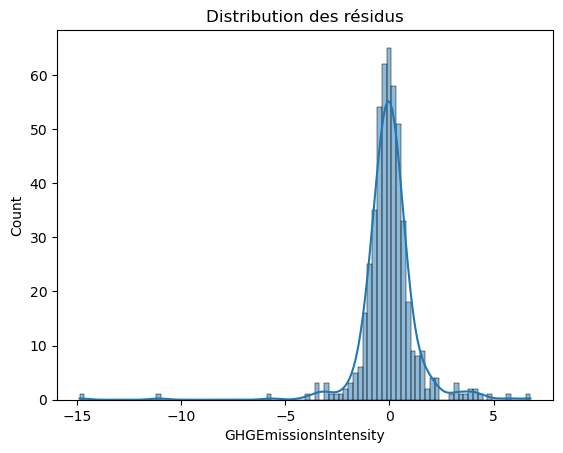

In [20]:
residus = y_test - y_pred
sns.histplot(residus, kde=True)
plt.title("Distribution des résidus")
plt.show()

- Utilisons la méthode de validation croisée << GridsearchCV >> pour optimiser les paramètres du <span style="color: blue;">modèle Lasso</span> 

Meilleurs paramètres : {'alpha': 0.1}
RMSE : 1.3842567849053133
R2 : 0.5860596067315074
MAE : 0.7712782112940879


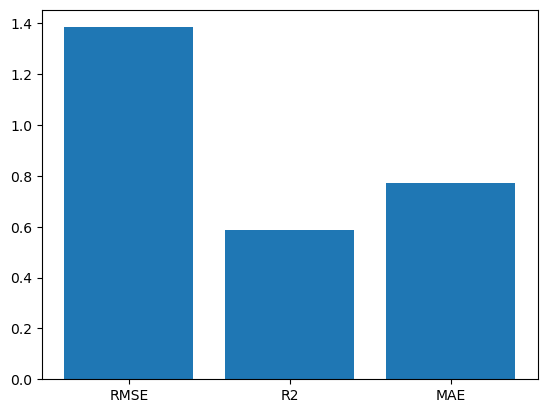

In [22]:
# Création du modèle Lasso
lasso_model = Lasso()

# Définition de la grille de paramètres à tester
param_grid = {'alpha': [0.1, 1, 10, 100]}

# Utilisation de GridSearchCV pour tester les paramètres
grid_search = GridSearchCV(lasso_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = grid_search.predict(X_test)

# Calcul de la RMSE sur l'ensemble de test
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Affichage des résultats
print('Meilleurs paramètres :', grid_search.best_params_)
print('RMSE :', rmse)
print('R2 :', r2)
print('MAE :', mae)

# Représentation graphique des résultats
fig, ax = plt.subplots()
ax.bar(['RMSE', 'R2', 'MAE'], [rmse, r2, mae])
plt.show()

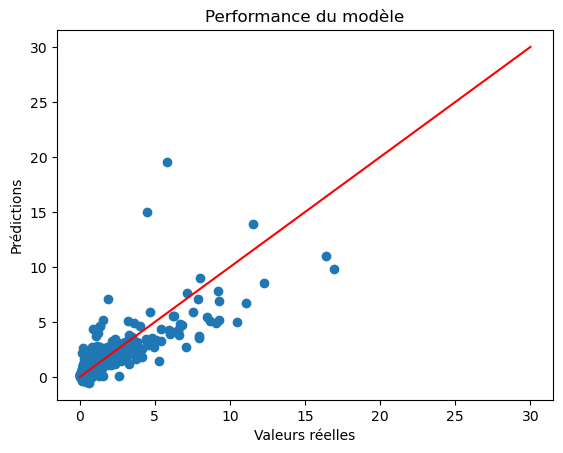

In [25]:
plt.scatter(y_test, y_pred)
plt.plot([0, 30], [0, 30], 'r')
plt.xlabel('Valeurs réelles')
plt.ylabel('Prédictions')
plt.title('Performance du modèle')
plt.show()

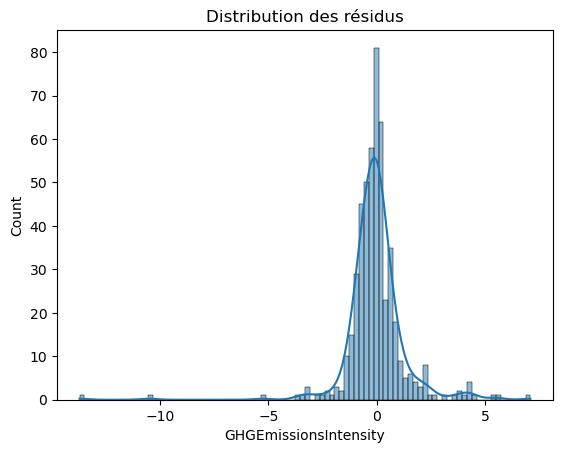

In [26]:
residus = y_test - y_pred
sns.histplot(residus, kde=True)
plt.title("Distribution des résidus")
plt.show()

- <b>Tableau recapitulatif des modèles linéaires</b> 

Testing Ridge...
RMSE: 1.67
R2: 0.48
MAE: 0.83

Testing Lasso...
RMSE: 1.72
R2: 0.46
MAE: 0.88

Testing Dummy...
RMSE: 2.50
R2: -0.10
MAE: 1.23

           RMSE        R2       MAE
Ridge  1.669269  0.483980  0.830972
Lasso  1.721039  0.462231  0.875323
Dummy  2.502591 -0.102937  1.231002


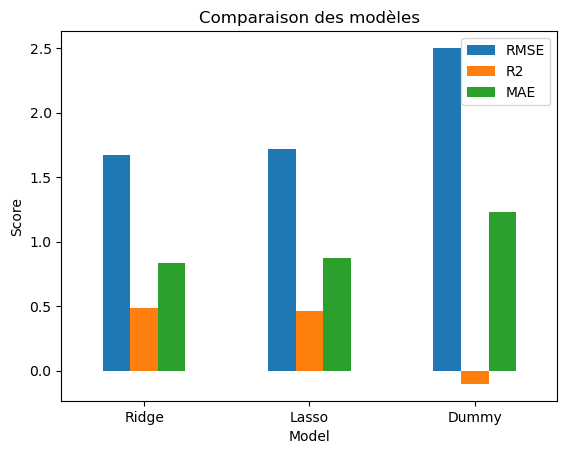

In [18]:
# Liste des modèles à tester
models = [
    ("Ridge", Ridge()),
    ("Lasso", Lasso()),
    ("Dummy", DummyRegressor())
]

# Liste des grilles de paramètres à tester pour chaque modèle
params = [
    {"alpha": [0.1, 1, 10]},
    {"alpha": [0.1, 1, 10]},
    {"strategy": ["mean", "median"]}
]

# Dictionnaire pour stocker les résultats
results = {}

# Fonction de scoring
scoring = {
    "RMSE": make_scorer(mean_squared_error, squared=False),
    "R2": make_scorer(r2_score),
    "MAE": make_scorer(mean_absolute_error)
}

# Boucle sur les modèles et les paramètres
for i, model in enumerate(models):
    print(f"Testing {model[0]}...")
    clf = GridSearchCV(model[1], params[i], scoring=scoring, refit="RMSE", cv=5)
    
    clf.fit(X_train, y_train)
    results[model[0]] = {
        "RMSE": clf.cv_results_["mean_test_RMSE"][clf.best_index_],
        "R2": clf.cv_results_["mean_test_R2"][clf.best_index_],
        "MAE": clf.cv_results_["mean_test_MAE"][clf.best_index_]
    }
    
    # Affichage des résultats
    print(f"RMSE: {results[model[0]]['RMSE']:.2f}")
    print(f"R2: {results[model[0]]['R2']:.2f}")
    print(f"MAE: {results[model[0]]['MAE']:.2f}\n")

# Création du dataframe pour afficher les résultats
df_results = pd.DataFrame.from_dict(results, orient="index")

# Affichage du tableau de résultats
print(df_results)

# Affichage graphique des résultats
df_results.plot(kind="bar", y=["RMSE", "R2", "MAE"])
plt.xticks(rotation=0)
plt.xlabel("Model")
plt.ylabel("Score")
plt.title("Comparaison des modèles")
plt.show()

Nous constatons avec les modèles linéaires que les modèles <span style="color: blue;">modèle Ridge</span> et <span style="color: blue;">modèle Lasso</span> améliorent la performance de notre modèle simple le <span style="color: blue;">Dummy Regressor</span> 

### 2.2. Modèles non-linéaires

- <span style="color: blue;">Régression ridge à noyau</span> 

In [14]:
# créer un jeu d'entrainement et un jeu de test (30% des données)
X_train, X_test, y_train, y_test = \
    model_selection.train_test_split(X, y, test_size=0.3)
                                
# standardiser les données
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)    

RMSE: 1.21
MAE: 0.70
R2: 0.65


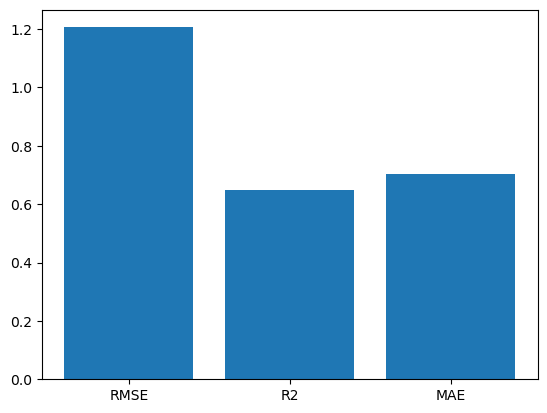

In [15]:
predicteur = kernel_ridge.KernelRidge(
    alpha=1.0, # valeur par défaut 
    kernel='rbf', # noyau Gaussien
    gamma=0.01)   # valeur de 1/(2 * sigma**2)
                                     
# entraîner le classifieur sur le jeu d'entrainement
predicteur.fit(X_train_std, y_train)

# prédire sur le jeu de test
y_test_pred = predicteur.predict(X_test_std)

# calculer les métriques sur le jeu de test
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
mae = metrics.mean_absolute_error(y_test, y_test_pred)
r2 = metrics.r2_score(y_test, y_test_pred)

# afficher les métriques
print("RMSE: {:.2f}".format(rmse))
print("MAE: {:.2f}".format(mae))
print("R2: {:.2f}".format(r2))

# Représentation graphique des résultats
fig, ax = plt.subplots()
ax.bar(['RMSE', 'R2', 'MAE'], [rmse, r2, mae])
plt.show()

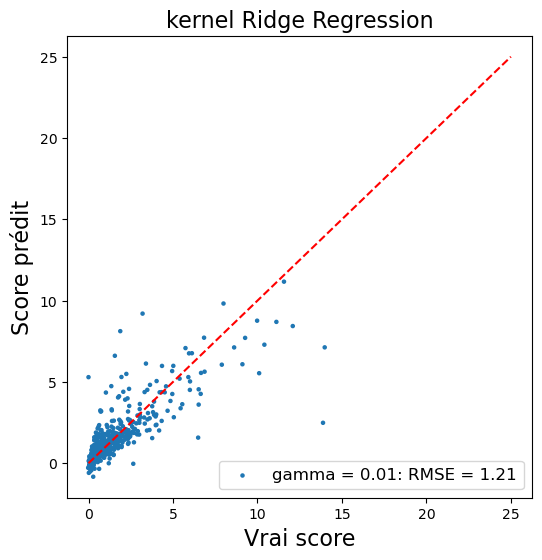

In [17]:
# créer une figure
fig = plt.figure(figsize=(6, 6))

# Compter, pour chaque paire de valeurs (y, y') où y est un vrai score et y' le score prédit,
# le nombre de ces paires.
# Ce nombre sera utilisé pour modifier la taille des marqueurs correspondants 
# dans un nuage de points
sizes = {}
for (yt, yp) in zip(list(y_test), list(y_test_pred)):
    if (yt, yp) in sizes.keys():
        sizes[(yt, yp)] += 5
    else:
        sizes[(yt, yp)] = 5     
keys = sizes.keys()

# afficher les prédictions
plt.scatter([k[0] for k in keys], 
            [k[1] for k in keys], 
             s=[sizes[k] for k in keys], 
            label="gamma = 0.01: RMSE = {:.2f}".format(rmse))

plt.plot([0, 25], [0, 25], "--", color="red")

# étiqueter les axes et le graphique
plt.xlabel('Vrai score', fontsize=16)
plt.ylabel(u'Score prédit', fontsize=16)
plt.title('kernel Ridge Regression', fontsize=16)

# limites des axes
#plt.xlim([2.9, 9.1])
#plt.ylim([2.9, 9.1])

# afficher la légende
plt.legend(loc="lower right", fontsize=12)

- <span style="color: blue;">Random Forest Regressor</span> 

{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
RandomForestRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                      n_estimators=50)
RMSE: 1.06 
R2: 0.76 
MAE: 0.60 
Time: 84.93s


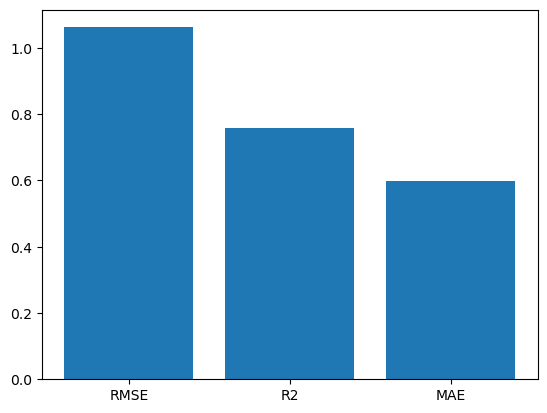

In [22]:
# Séparer les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialiser le modèle
rf = RandomForestRegressor()

start_time = timeit.default_timer()

# Faire une recherche de grille pour trouver les meilleurs hyperparamètres
param_grid = {
    "n_estimators": [50, 100, 150],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring="neg_mean_squared_error")
grid_search.fit(X_train, y_train)

# Obtenir les meilleurs hyperparamètres et le meilleur modèle
best_params = grid_search.best_params_
print(best_params)
best_model = grid_search.best_estimator_
print(best_model)

# Faire des prédictions avec le meilleur modèle
y_pred = best_model.predict(X_test)
elapsed = timeit.default_timer() - start_time

# Calculer la RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculer la R2
r2 = r2_score(y_test, y_pred)

# Calculer la MAE
mae = mean_absolute_error(y_test, y_pred)

print("RMSE: {:.2f} \nR2: {:.2f} \nMAE: {:.2f} \nTime: {:.2f}s".format(rmse, r2, mae, elapsed))

# Représentation graphique des résultats
fig, ax = plt.subplots()
ax.bar(['RMSE', 'R2', 'MAE'], [rmse, r2, mae])
plt.show()

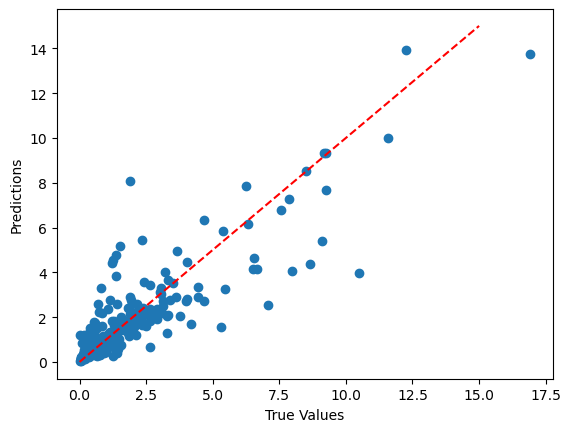

In [23]:
# Visualiser les prédictions par rapport aux vraies valeurs
plt.scatter(y_test, y_pred)
plt.plot([0, 15], [0, 15], "--", color="red")
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

- <span style="color: blue;">Gradient boosting</span> 

Meilleurs paramètres :  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Meilleur score :  2.6674366340861444
RMSE 1.07, R2 0.75, MAE 0.60, time 55.00s


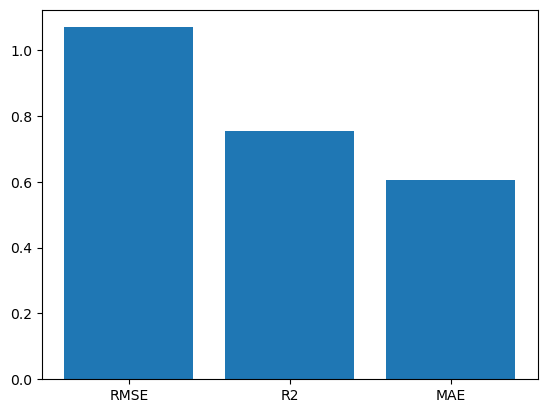

In [21]:
# Définition des paramètres à tester
params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7]
}

# Instanciation du modèle
gb_reg = GradientBoostingRegressor()

start_time = timeit.default_timer()

# Recherche des meilleurs hyperparamètres
grid_search = GridSearchCV(gb_reg, params, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Affichage des meilleurs paramètres et du meilleur score
print("Meilleurs paramètres : ", grid_search.best_params_)
print("Meilleur score : ", -grid_search.best_score_)

# Entraînement du modèle avec les meilleurs paramètres
best_gb_reg = GradientBoostingRegressor(**grid_search.best_params_)
best_gb_reg.fit(X_train, y_train)

# Prédiction sur les données de test
y_pred = best_gb_reg.predict(X_test)
elapsed = timeit.default_timer() - start_time

# Calcul des métriques
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("RMSE {:.2f}, R2 {:.2f}, MAE {:.2f}, time {:.2f}s".format(rmse, r2, mae, elapsed))

# Représentation graphique des résultats
fig, ax = plt.subplots()
ax.bar(['RMSE', 'R2', 'MAE'], [rmse, r2, mae])
plt.show()

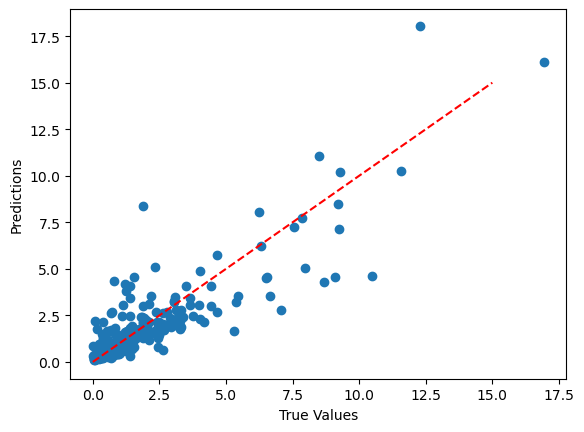

In [36]:
# Tracer la courbe des vraies valeurs et des prédictions
plt.scatter(y_test, y_pred)
plt.plot([0, 15], [0, 15], "--", color="red")
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

- <b>Tableau recapitulatif des modèles non-linéaires</b> 

Testing Random Forest...
Random Forest RMSE: 1.11
Random Forest R2: 0.74
Random Forest MAE: 0.67

Testing Gradient Boosting...
Gradient Boosting RMSE: 1.18
Gradient Boosting R2: 0.70
Gradient Boosting MAE: 0.68

Testing Kernel Ridge...


Ill-conditioned matrix (rcond=1.82836e-17): result may not be accurate.
Ill-conditioned matrix (rcond=1.81688e-17): result may not be accurate.
Ill-conditioned matrix (rcond=2.00209e-17): result may not be accurate.
Ill-conditioned matrix (rcond=4.8234e-17): result may not be accurate.
Ill-conditioned matrix (rcond=1.97507e-17): result may not be accurate.


Kernel Ridge RMSE: 2.70
Kernel Ridge R2: -0.56
Kernel Ridge MAE: 1.61

                       RMSE        R2       MAE
Model                                          
Random Forest      1.559393  0.537686  0.756311
Gradient Boosting  1.943129  0.202976  0.816144
Kernel Ridge       2.831852 -0.545644  1.623016


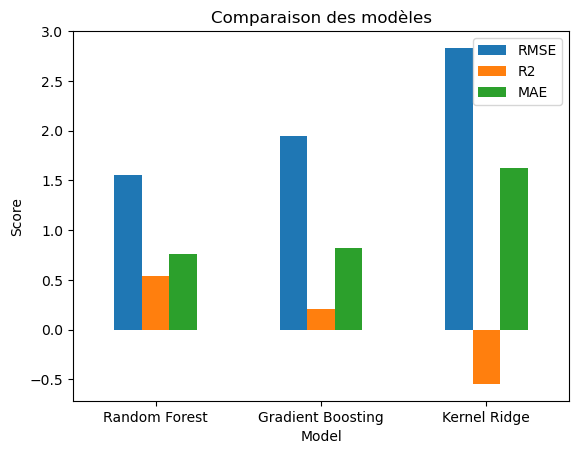

In [28]:
# Liste des modèles à tester
models = [
    ("Random Forest", RandomForestRegressor()),
    ("Gradient Boosting", GradientBoostingRegressor()),
    ("Kernel Ridge", KernelRidge())
]

# Liste des grilles de paramètres à tester pour chaque modèle
params = [
    {"n_estimators": [50, 100, 150], "max_depth": [None, 5, 10]},
    {"n_estimators": [50, 100, 200], "learning_rate": [0.01, 0.1, 0.5], "max_depth": [3, 5, 7]},
    {"alpha": [0.1, 1, 10], "kernel": ['linear', 'rbf']}
]

# Dictionnaire pour stocker les résultats
results = {}

# Fonction de scoring
scoring = {"RMSE": make_scorer(mean_squared_error, squared=False), 
           "R2": make_scorer(r2_score),
           "MAE": make_scorer(mean_absolute_error)}

# Boucle sur les modèles et les paramètres
for i, model in enumerate(models):
    print(f"Testing {model[0]}...")
    clf = GridSearchCV(model[1], params[i], scoring=scoring, refit="RMSE", cv=5)
    clf.fit(X_train, y_train)
    results[model[0]] = {"RMSE": clf.cv_results_["mean_test_RMSE"][clf.best_index_],
                         "R2": clf.cv_results_["mean_test_R2"][clf.best_index_],
                         "MAE": clf.cv_results_["mean_test_MAE"][clf.best_index_]}
    
    # Prédiction sur les données de test
    y_pred = clf.predict(X_test)

    # Affichage des résultats sur les données de test
    print(f"{model[0]} RMSE: {mean_squared_error(y_test, y_pred, squared=False):.2f}")
    print(f"{model[0]} R2: {r2_score(y_test, y_pred):.2f}")
    print(f"{model[0]} MAE: {mean_absolute_error(y_test, y_pred):.2f}\n")

# Création du dataframe pour afficher les résultats
df_results = pd.DataFrame.from_dict(results, orient="index")
df_results.index.name = "Model"

# Affichage du tableau de résultats
print(df_results)

# Affichage des graphiques
df_results.plot(kind="bar", y=["RMSE", "R2", "MAE"])
plt.xticks(rotation=0)
plt.xlabel("Model")
plt.ylabel("Score")
plt.title("Comparaison des modèles")
plt.show()

### 2.3. Tableau recapitulatif de l'ensemble des modèles

Testing Ridge...
Testing Lasso...
Testing Random Forest...
Testing Gradient Boosting...
Testing Kernel Ridge...


Ill-conditioned matrix (rcond=1.82836e-17): result may not be accurate.
Ill-conditioned matrix (rcond=1.81688e-17): result may not be accurate.
Ill-conditioned matrix (rcond=2.00209e-17): result may not be accurate.
Ill-conditioned matrix (rcond=4.8234e-17): result may not be accurate.
Ill-conditioned matrix (rcond=1.97507e-17): result may not be accurate.


Testing Dummy...
                       RMSE       MAE        R2  \
Model                                             
Ridge              1.637606  0.824815  0.478654   
Lasso              1.681479  0.874495  0.460304   
Random Forest      1.621327  0.759991  0.491894   
Gradient Boosting  1.863535  1.075508  0.365240   
Kernel Ridge       2.831852  1.623016 -0.545644   
Dummy              2.430579  1.227025 -0.110343   

                                                              Params  
Model                                                                 
Ridge                                                 {'alpha': 0.1}  
Lasso                                                  {'alpha': 10}  
Random Forest                   {'max_depth': 5, 'n_estimators': 50}  
Gradient Boosting  {'learning_rate': 0.01, 'max_depth': 3, 'n_est...  
Kernel Ridge                          {'alpha': 10, 'kernel': 'rbf'}  
Dummy                                         {'strategy': 'median'}  


<AxesSubplot:xlabel='R2', ylabel='Model'>

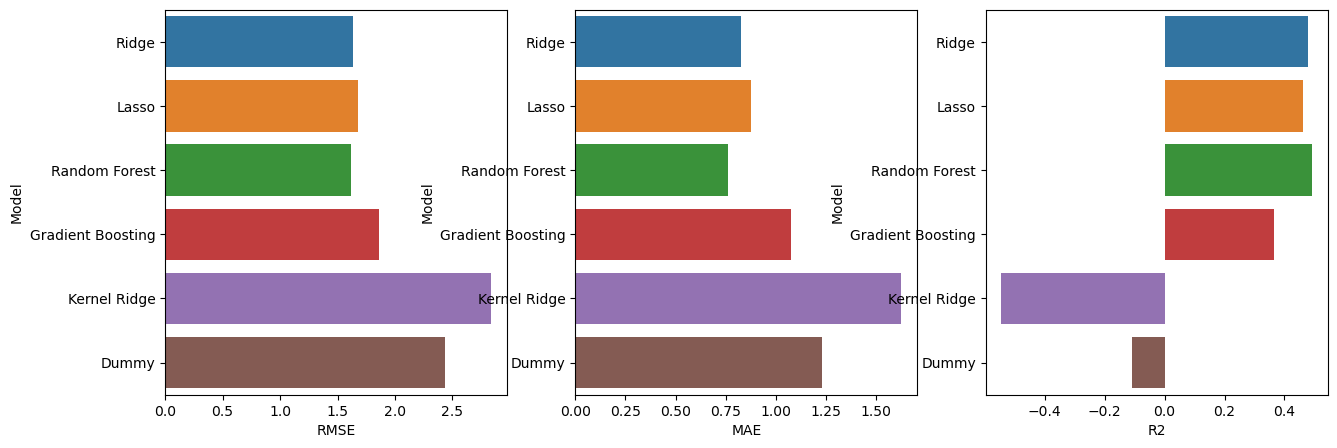

In [30]:
# Liste des modèles à tester
models = [
    ("Ridge", Ridge()),
    ("Lasso", Lasso()),
    ("Random Forest", RandomForestRegressor()),
    ("Gradient Boosting", GradientBoostingRegressor()),
    ("Kernel Ridge", KernelRidge()),
    ("Dummy", DummyRegressor())
]

# Liste des grilles de paramètres à tester pour chaque modèle
params = [
    {"alpha": [0.1, 1, 10]},
    {"alpha": [0.1, 1, 10]},
    {"n_estimators": [50, 100, 150], "max_depth": [None, 5, 10]},
    {"n_estimators": [50, 100, 200], "learning_rate": [0.01, 0.1, 0.5], "max_depth": [3, 5, 7]},
    {"alpha": [0.1, 1, 10], "kernel": ["linear", "rbf"]},
    {"strategy": ["mean", "median"]}
]

# Dictionnaire pour stocker les résultats
results = {}

# Fonctions de scoring
scoring = {"RMSE": make_scorer(mean_squared_error, squared=False),
           "MAE": make_scorer(mean_absolute_error),
           "R2": make_scorer(r2_score)}

# Boucle sur les modèles et les paramètres
for i, model in enumerate(models):
    print(f"Testing {model[0]}...")
    clf = GridSearchCV(model[1], params[i], scoring=scoring, refit="RMSE", cv=5)
    clf.fit(X_train, y_train)
    results[model[0]] = {"RMSE": clf.cv_results_["mean_test_RMSE"][clf.best_index_],
                         "MAE": clf.cv_results_["mean_test_MAE"][clf.best_index_],
                         "R2": clf.cv_results_["mean_test_R2"][clf.best_index_],
                         "Params": clf.best_params_}

# Création du dataframe pour afficher les résultats
df_results = pd.DataFrame.from_dict(results, orient="index")
df_results.index.name = "Model"

# Affichage du tableau de résultats
print(df_results)

# Affichage des graphiques de comparaison des modèles
fig, axs = plt.subplots(ncols=3, figsize=(15,5))
sns.barplot(data=df_results, y=df_results.index, x="RMSE", ax=axs[0])
sns.barplot(data=df_results, y=df_results.index, x="MAE", ax=axs[1])
sns.barplot(data=df_results, y=df_results.index, x="R2", ax=axs[2])

<b><font size="3">Remarque : </font></b> Nous constatons que les modèles non linéaires améliorent la performance des modèles linéaires et le meilleur modèle est <b>Random Forest Regressor</b> 

### 2.4. Feature importance sans 'ENERGYSTARScore'

- Feature importance globale

In [145]:
# Le meilheure model de l'ensemble des modèles utilisés
best_model

RandomForestRegressor(min_samples_leaf=2, n_estimators=50)

In [146]:
# Calcule l'importance de chaque feature (variable) dans le modèle de régression Random Forest
importances = best_model.feature_importances_

In [147]:
# Récupérer les noms de chaque colonne (feature) 
feature_names = X.columns

In [148]:
# Calcule de l'écart-type des importances des différentes variables (features) du modèle
std = np.std([tree.feature_importances_ for tree in best_model.estimators_], axis=0)

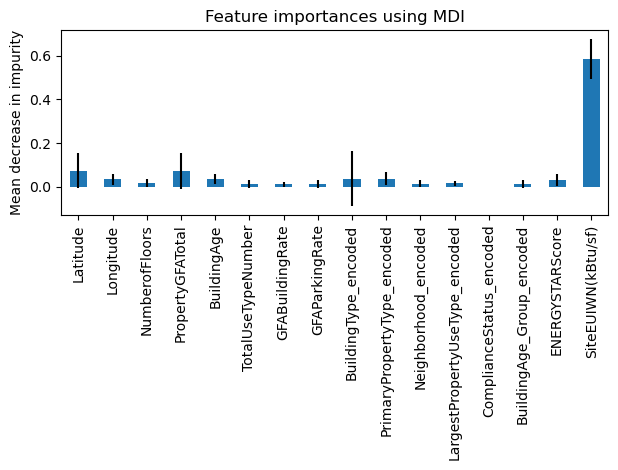

In [149]:
# créer une série pandas contenant les importances de chaque caractéristique
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

- Feature importance locale

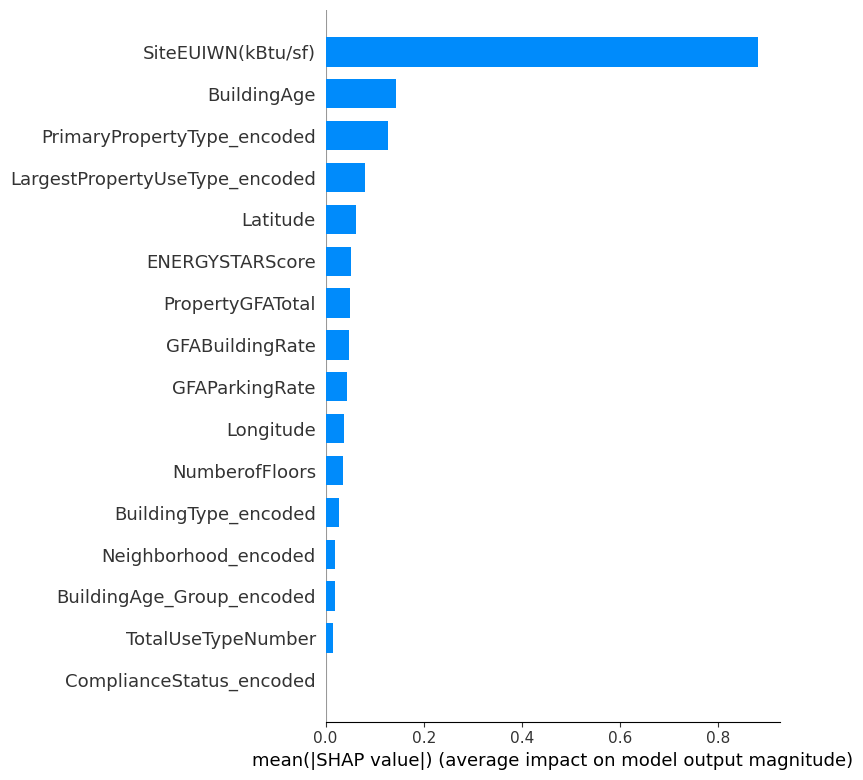

In [150]:
# Réinitialiser les index de X_test pour les aligner avec ceux de shap_values
X_test.reset_index(drop=True, inplace=True)

# la contribution de chaque featue à l'ensemble des prédictions du modèle sur l'ensemble de données de test
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)

# Affichage des sommaires SHAP pour chaque caractéristique
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [151]:
# load JS visualization code to notebook
shap.initjs()

L'initialisation de la bibliothèque JavaScript SHAP est nécessaire pour pouvoir afficher les graphiques dans un notebook Jupyter.

In [155]:
i = 1
shap.force_plot(explainer.expected_value, shap_values[i], features=X_test.iloc[i], feature_names=X_test.columns)

Nous avons ci-dessus le diagramme de dispersion SHAP pour une observation donnée (ici l'observation 1), en utilisant la bibliothèque SHAP. Les variables poussant la prédiction vers le haut sont affichées en rouge, celles poussant la prédiction vers le bas sont en bleu.

## 3. Prédictions des modèles avec " ENERGYSTARScore "

In [162]:
# Le dataset avec la variable "ENERGY STAR Score"
columns = ['Latitude', 'Longitude', 'NumberofFloors', 'PropertyGFATotal', 'BuildingAge', 'TotalUseTypeNumber', 'GFABuildingRate', 
           'GFAParkingRate', 'BuildingType_encoded', 'PrimaryPropertyType_encoded', 'Neighborhood_encoded', 'LargestPropertyUseType_encoded', 
           'ComplianceStatus_encoded','BuildingAge_Group_encoded', 'ENERGYSTARScore', 'GHGEmissionsIntensity', 'SiteEUIWN(kBtu/sf)']
df_with_score = building_df_cleaned[columns]
df_with_score

,Latitude,Longitude,NumberofFloors,PropertyGFATotal,BuildingAge,TotalUseTypeNumber,GFABuildingRate,GFAParkingRate,BuildingType_encoded,PrimaryPropertyType_encoded,Neighborhood_encoded,LargestPropertyUseType_encoded,ComplianceStatus_encoded,BuildingAge_Group_encoded,ENERGYSTARScore,GHGEmissionsIntensity,SiteEUIWN(kBtu/sf)
0,47.61220,-122.33799,12,88434,89,1,1.00,0.00,1,2,6,13,0,8,60.0,2.83,84.300003
1,47.61317,-122.33393,11,103566,20,3,0.85,0.15,1,2,6,13,0,2,61.0,2.86,97.900002
2,47.61393,-122.33810,41,956110,47,1,0.79,0.21,1,2,6,13,0,4,43.0,2.19,97.699997
3,47.61412,-122.33664,10,61320,90,1,1.00,0.00,1,2,6,13,0,9,56.0,4.67,113.300003
4,47.61375,-122.34047,18,175580,36,3,0.65,0.35,1,2,6,13,0,3,75.0,2.88,118.699997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1646,47.56722,-122.31154,1,12294,26,1,1.00,0.00,2,9,9,24,0,2,46.0,1.70,76.699997
1647,47.59625,-122.32283,1,16000,12,1,1.00,0.00,2,10,6,31,0,1,NaN,2.01,65.900002
1648,47.63644,-122.35784,1,13157,42,3,1.00,0.00,2,10,11,31,0,4,NaN,16.99,460.100006
1649,47.52832,-122.32431,1,14101,27,5,1.00,0.00,2,8,9,31,0,2,NaN,1.57,55.500000


- Construisons un sous-ensemble du dataset avec les bâtiments ayant une valeur de l’EnergyStarScore non nulle

In [163]:
# Créer le dataset basé sur les bâtiments ayant une valeur de l’EnergyStarScore non nulle
df_with_score = df_with_score.dropna(subset='ENERGYSTARScore')
df_with_score

,Latitude,Longitude,NumberofFloors,PropertyGFATotal,BuildingAge,TotalUseTypeNumber,GFABuildingRate,GFAParkingRate,BuildingType_encoded,PrimaryPropertyType_encoded,Neighborhood_encoded,LargestPropertyUseType_encoded,ComplianceStatus_encoded,BuildingAge_Group_encoded,ENERGYSTARScore,GHGEmissionsIntensity,SiteEUIWN(kBtu/sf)
0,47.61220,-122.33799,12,88434,89,1,1.00,0.00,1,2,6,13,0,8,60.0,2.83,84.300003
1,47.61317,-122.33393,11,103566,20,3,0.85,0.15,1,2,6,13,0,2,61.0,2.86,97.900002
2,47.61393,-122.33810,41,956110,47,1,0.79,0.21,1,2,6,13,0,4,43.0,2.19,97.699997
3,47.61412,-122.33664,10,61320,90,1,1.00,0.00,1,2,6,13,0,9,56.0,4.67,113.300003
4,47.61375,-122.34047,18,175580,36,3,0.65,0.35,1,2,6,13,0,3,75.0,2.88,118.699997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1630,47.53161,-122.29944,2,24990,87,1,1.00,0.00,1,17,9,24,0,8,9.0,5.39,189.300003
1632,47.58831,-122.30650,3,45000,1,2,1.00,0.00,1,3,9,14,0,0,77.0,0.21,30.600000
1641,47.63572,-122.37525,1,13661,64,1,1.00,0.00,2,9,11,24,0,6,75.0,0.26,40.900002
1644,47.56440,-122.27813,1,15398,56,1,1.00,0.00,2,9,17,24,0,5,93.0,0.51,26.900000


### 3.1. Modèles linéaires

In [164]:
# Créer des objets X et y qui séparent les variables d'entrée (X) de la variable cible (y) dans le cadre de la modélisation prédictive.
X = df_with_score.drop(columns = 'GHGEmissionsIntensity')
y = df_with_score['GHGEmissionsIntensity']

In [165]:
# Normalisation de mes données
std_scale = preprocessing.StandardScaler().fit(X)
X_train_std = std_scale.transform(X)

On sépare ensuite le jeu de données en données d'entraînement et données test

In [166]:
X_train, X_test, y_train, y_test = train_test_split(X_train_std, y, test_size=0.3, random_state = 42)

In [161]:
X_train.shape

(758, 16)

- Utilisons la méthode de validation croisée << GridsearchCV >> pour optimiser les paramètres du <span style="color: blue;">modèle Dummy Regressor</span> 

Meilleurs paramètres : {'quantile': 0.25, 'strategy': 'mean'}
RMSE : 1.501143819839266
R2 : -0.0005486864960762006
MAE : 1.0483986198498072


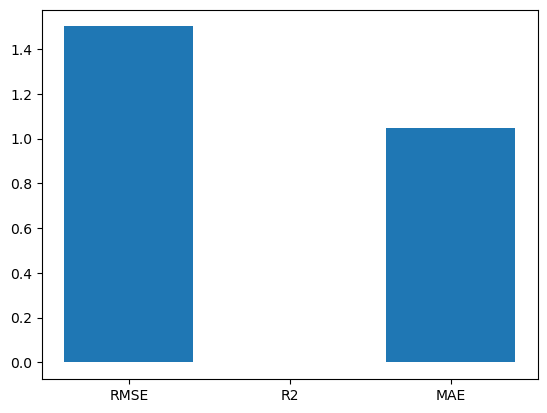

In [167]:
# Définition des paramètres à tester
param_grid = {'strategy': ['mean', 'median', 'quantile'], 'quantile': [0.25, 0.5, 0.75]}

# Création du modèle
dummy = DummyRegressor()

# Validation croisée
grid_search = GridSearchCV(dummy, param_grid=param_grid, cv=5, scoring=['neg_mean_squared_error', 'r2', 'neg_mean_absolute_error'], refit='r2')
grid_search.fit(X_train, y_train)

# Prédiction sur l'ensemble de validation avec les meilleurs paramètres
best_dummy = grid_search.best_estimator_
y_pred = best_dummy.predict(X_test)

# Calcul de la RMSE, du R2 et du MAE sur l'ensemble de validation
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Affichage des résultats
print('Meilleurs paramètres :', grid_search.best_params_)
print('RMSE :', rmse)
print('R2 :', r2)
print('MAE :', mae)

# Représentation graphique des résultats
fig, ax = plt.subplots()
ax.bar(['RMSE', 'R2', 'MAE'], [rmse, r2, mae])
plt.show()

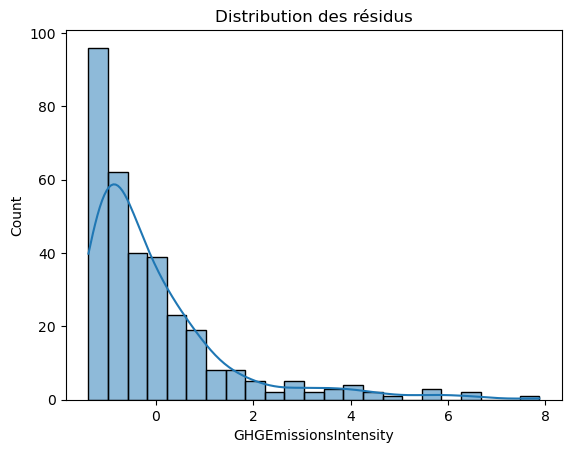

In [168]:
residus = y_test - y_pred
sns.histplot(residus, kde=True)
plt.title("Distribution des résidus")
plt.show()

- Utilisons la méthode de validation croisée << GridsearchCV >> pour optimiser les paramètres du <span style="color: blue;">modèle Ridge</span> 

Meilleurs paramètres : {'alpha': 100}
RMSE : 1.0743054949154738
R2 : 0.48755269307752236
MAE : 0.7330894133513272


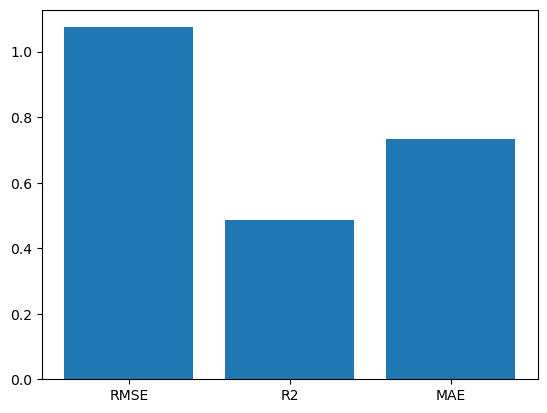

In [169]:
# Création du modèle Ridge
ridge_model = Ridge()

# Définition de la grille de paramètres à tester
param_grid = {'alpha': [0.1, 1, 10, 100]}

# Utilisation de GridSearchCV pour tester les paramètres
grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = grid_search.predict(X_test)

# Calcul de la RMSE sur l'ensemble de test
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Affichage des résultats
print('Meilleurs paramètres :', grid_search.best_params_)
print('RMSE :', rmse)
print('R2 :', r2)
print('MAE :', mae)

# Représentation graphique des résultats
fig, ax = plt.subplots()
ax.bar(['RMSE', 'R2', 'MAE'], [rmse, r2, mae])
plt.show()

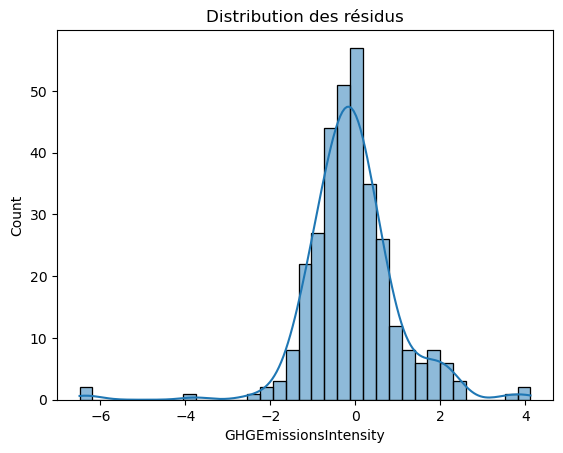

In [170]:
residus = y_test - y_pred
sns.histplot(residus, kde=True)
plt.title("Distribution des résidus")
plt.show()

- Utilisons la méthode de validation croisée << GridsearchCV >> pour optimiser les paramètres du <span style="color: blue;">modèle Lasso</span> 

Meilleurs paramètres : {'alpha': 0.1}
RMSE : 1.1161066713235035
R2 : 0.44689825448020004
MAE : 0.7373542505384467


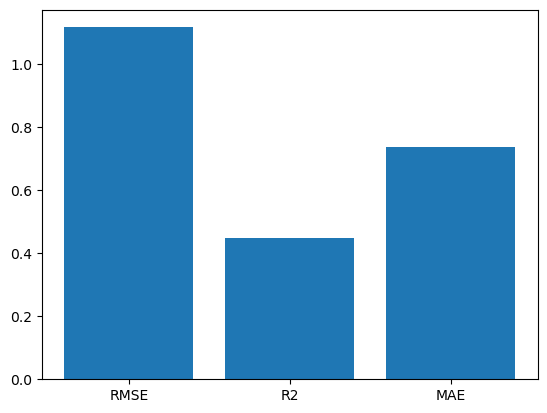

In [171]:
# Création du modèle Lasso
lasso_model = Lasso()

# Définition de la grille de paramètres à tester
param_grid = {'alpha': [0.1, 1, 10, 100]}

# Utilisation de GridSearchCV pour tester les paramètres
grid_search = GridSearchCV(lasso_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = grid_search.predict(X_test)

# Calcul de la RMSE sur l'ensemble de test
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Affichage des résultats
print('Meilleurs paramètres :', grid_search.best_params_)
print('RMSE :', rmse)
print('R2 :', r2)
print('MAE :', mae)

# Représentation graphique des résultats
fig, ax = plt.subplots()
ax.bar(['RMSE', 'R2', 'MAE'], [rmse, r2, mae])
plt.show()

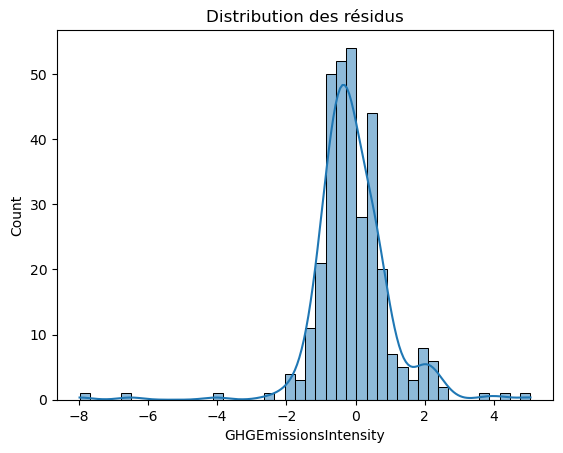

In [172]:
residus = y_test - y_pred
sns.histplot(residus, kde=True)
plt.title("Distribution des résidus")
plt.show()

- <b>Tableau recapitulatif des modèles linéaires</b> 

Testing Ridge...
RMSE: 1.61
R2: 0.35
MAE: 0.81

Testing Lasso...
RMSE: 2.01
R2: -0.01
MAE: 1.17

Testing Dummy...
RMSE: 2.11
R2: -0.12
MAE: 1.03

           RMSE        R2       MAE
Ridge  1.608556  0.349764  0.805322
Lasso  2.007460 -0.007615  1.167733
Dummy  2.105949 -0.117812  1.029211


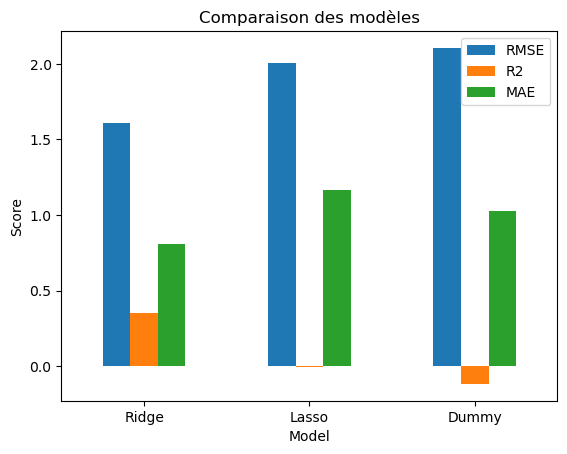

In [173]:
# Liste des modèles à tester
models = [
    ("Ridge", Ridge()),
    ("Lasso", Lasso()),
    ("Dummy", DummyRegressor())
]

# Liste des grilles de paramètres à tester pour chaque modèle
params = [
    {"alpha": [0.1, 1, 10]},
    {"alpha": [0.1, 1, 10]},
    {"strategy": ["mean", "median"]}
]

# Dictionnaire pour stocker les résultats
results = {}

# Fonction de scoring
scoring = {
    "RMSE": make_scorer(mean_squared_error, squared=False),
    "R2": make_scorer(r2_score),
    "MAE": make_scorer(mean_absolute_error)
}

# Boucle sur les modèles et les paramètres
for i, model in enumerate(models):
    print(f"Testing {model[0]}...")
    clf = GridSearchCV(model[1], params[i], scoring=scoring, refit="RMSE", cv=5)
    
    clf.fit(X_train, y_train)
    results[model[0]] = {
        "RMSE": clf.cv_results_["mean_test_RMSE"][clf.best_index_],
        "R2": clf.cv_results_["mean_test_R2"][clf.best_index_],
        "MAE": clf.cv_results_["mean_test_MAE"][clf.best_index_]
    }
    
    # Affichage des résultats
    print(f"RMSE: {results[model[0]]['RMSE']:.2f}")
    print(f"R2: {results[model[0]]['R2']:.2f}")
    print(f"MAE: {results[model[0]]['MAE']:.2f}\n")

# Création du dataframe pour afficher les résultats
df_results = pd.DataFrame.from_dict(results, orient="index")

# Affichage du tableau de résultats
print(df_results)

# Affichage graphique des résultats
df_results.plot(kind="bar", y=["RMSE", "R2", "MAE"])
plt.xticks(rotation=0)
plt.xlabel("Model")
plt.ylabel("Score")
plt.title("Comparaison des modèles")
plt.show()

### 3.2. Modèles non-linéaires

- <span style="color: blue;">Régression ridge à noyau</span> 

In [174]:
# créer un jeu d'entrainement et un jeu de test (30% des données)
X_train, X_test, y_train, y_test = \
    model_selection.train_test_split(X, y, test_size=0.3)
                                
# standardiser les données
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)      

RMSE: 1.18
MAE: 0.65
R2: 0.61


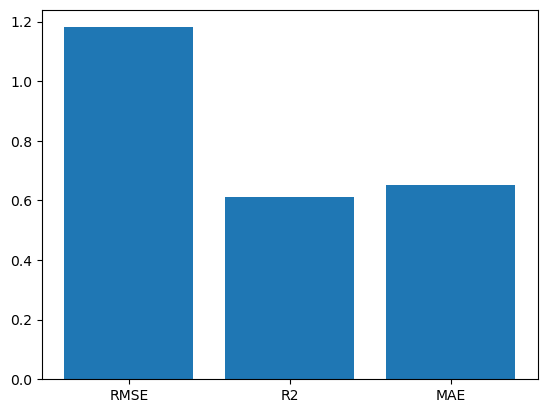

In [175]:
predicteur = kernel_ridge.KernelRidge(
    alpha=1.0, # valeur par défaut 
    kernel='rbf', # noyau Gaussien
    gamma=0.01)   # valeur de 1/(2 * sigma**2)
                                     
# entraîner le classifieur sur le jeu d'entrainement
predicteur.fit(X_train_std, y_train)

# prédire sur le jeu de test
y_test_pred = predicteur.predict(X_test_std)

# calculer les métriques sur le jeu de test
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
mae = metrics.mean_absolute_error(y_test, y_test_pred)
r2 = metrics.r2_score(y_test, y_test_pred)

# afficher les métriques
print("RMSE: {:.2f}".format(rmse))
print("MAE: {:.2f}".format(mae))
print("R2: {:.2f}".format(r2))

# Représentation graphique des résultats
fig, ax = plt.subplots()
ax.bar(['RMSE', 'R2', 'MAE'], [rmse, r2, mae])
plt.show()

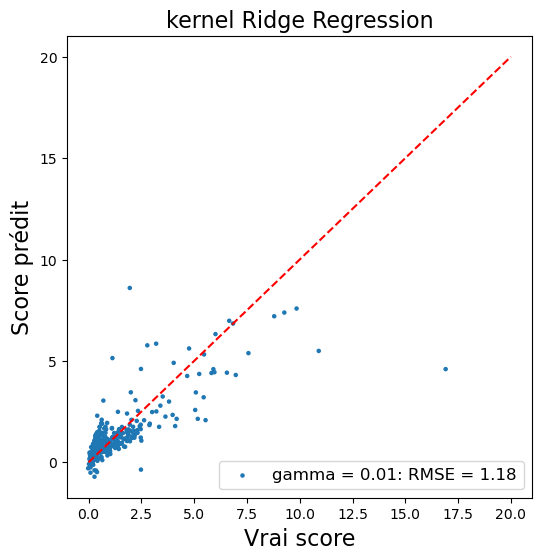

In [177]:
# créer une figure
fig = plt.figure(figsize=(6, 6))

# Compter, pour chaque paire de valeurs (y, y') où y est un vrai score et y' le score prédit,
# le nombre de ces paires.
# Ce nombre sera utilisé pour modifier la taille des marqueurs correspondants 
# dans un nuage de points
sizes = {}
for (yt, yp) in zip(list(y_test), list(y_test_pred)):
    if (yt, yp) in sizes.keys():
        sizes[(yt, yp)] += 5
    else:
        sizes[(yt, yp)] = 5     
keys = sizes.keys()

# afficher les prédictions
plt.scatter([k[0] for k in keys], 
            [k[1] for k in keys], 
             s=[sizes[k] for k in keys], 
            label="gamma = 0.01: RMSE = {:.2f}".format(rmse))

plt.plot([0, 20], [0, 20], "--", color="red")

# étiqueter les axes et le graphique
plt.xlabel('Vrai score', fontsize=16)
plt.ylabel(u'Score prédit', fontsize=16)
plt.title('kernel Ridge Regression', fontsize=16)

# limites des axes
#plt.xlim([2.9, 9.1])
#plt.ylim([2.9, 9.1])

# afficher la légende
plt.legend(loc="lower right", fontsize=12)

- <span style="color: blue;">Random Forest Regressor</span> 

{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
RandomForestRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                      n_estimators=50)
RMSE: 0.84 
R2: 0.65 
MAE: 0.48 
Time: 65.94s


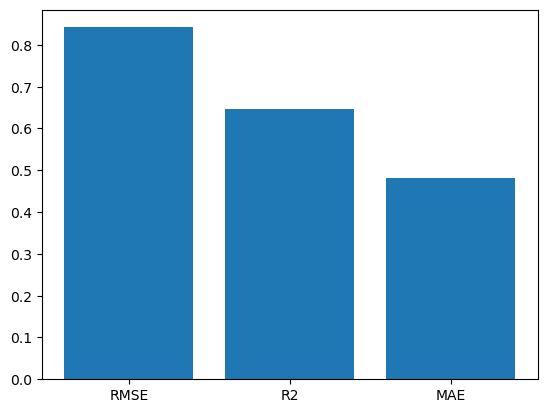

In [178]:
# Séparer les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialiser le modèle
rf = RandomForestRegressor()

start_time = timeit.default_timer()

# Faire une recherche de grille pour trouver les meilleurs hyperparamètres
param_grid = {
    "n_estimators": [50, 100, 150],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring="neg_mean_squared_error")
grid_search.fit(X_train, y_train)

# Obtenir les meilleurs hyperparamètres et le meilleur modèle
best_params = grid_search.best_params_
print(best_params)
best_model = grid_search.best_estimator_
print(best_model)

# Faire des prédictions avec le meilleur modèle
y_pred = best_model.predict(X_test)
elapsed = timeit.default_timer() - start_time

# Calculer la RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculer la R2
r2 = r2_score(y_test, y_pred)

# Calculer la MAE
mae = mean_absolute_error(y_test, y_pred)

print("RMSE: {:.2f} \nR2: {:.2f} \nMAE: {:.2f} \nTime: {:.2f}s".format(rmse, r2, mae, elapsed))

# Représentation graphique des résultats
fig, ax = plt.subplots()
ax.bar(['RMSE', 'R2', 'MAE'], [rmse, r2, mae])
plt.show()

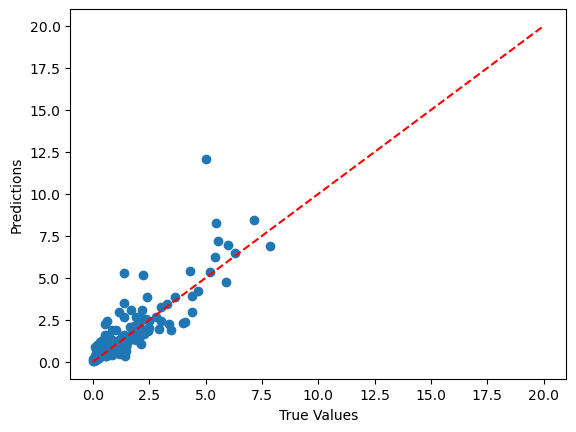

In [180]:
# Visualiser les prédictions par rapport aux vraies valeurs
plt.scatter(y_test, y_pred)
plt.plot([0, 20], [0, 20], "--", color="red")
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

- <span style="color: blue;">Gradient boosting</span> 

Meilleurs paramètres :  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Meilleur score :  1.9557706802906523
GradientBoostingRegressor(n_estimators=200)
RMSE 0.80, R2 0.68, MAE 0.51, time 42.62s


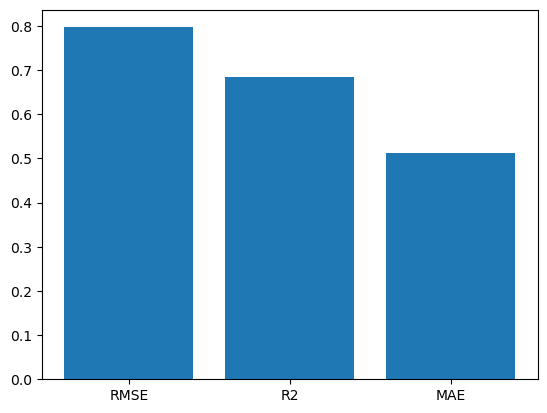

In [181]:
# Définition des paramètres à tester
params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7]
}

# Instanciation du modèle
gb_reg = GradientBoostingRegressor()

start_time = timeit.default_timer()

# Recherche des meilleurs hyperparamètres
grid_search = GridSearchCV(gb_reg, params, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Affichage des meilleurs paramètres et du meilleur score
print("Meilleurs paramètres : ", grid_search.best_params_)
print("Meilleur score : ", -grid_search.best_score_)

# Entraînement du modèle avec les meilleurs paramètres
best_gb_reg = GradientBoostingRegressor(**grid_search.best_params_)
best_gb_reg.fit(X_train, y_train)

# Affichage du meilleur modèle
print(best_gb_reg)

# Prédiction sur les données de test
y_pred = best_gb_reg.predict(X_test)
elapsed = timeit.default_timer() - start_time

# Calcul des métriques
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("RMSE {:.2f}, R2 {:.2f}, MAE {:.2f}, time {:.2f}s".format(rmse, r2, mae, elapsed))

# Représentation graphique des résultats
fig, ax = plt.subplots()
ax.bar(['RMSE', 'R2', 'MAE'], [rmse, r2, mae])
plt.show()

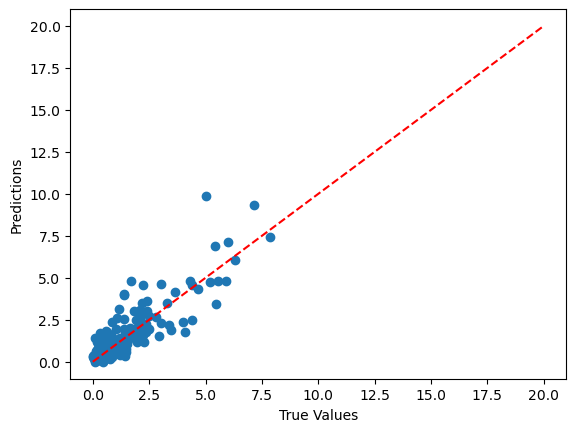

In [182]:
# Tracer la courbe des vraies valeurs et des prédictions
plt.scatter(y_test, y_pred)
plt.plot([0, 20], [0, 20], "--", color="red")
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

- <b>Tableau recapitulatif des modèles non-linéaires</b> 

Testing Random Forest...
Random Forest RMSE: 0.81
Random Forest R2: 0.67
Random Forest MAE: 0.54

Testing Gradient Boosting...
Gradient Boosting RMSE: 1.10
Gradient Boosting R2: 0.40
Gradient Boosting MAE: 0.84

Testing Kernel Ridge...
Kernel Ridge RMSE: 1.91
Kernel Ridge R2: -0.82
Kernel Ridge MAE: 1.28

                       RMSE        R2       MAE
Model                                          
Random Forest      1.359031  0.528687  0.643901
Gradient Boosting  1.650547  0.307016  0.939291
Kernel Ridge       2.409944 -0.608704  1.395511


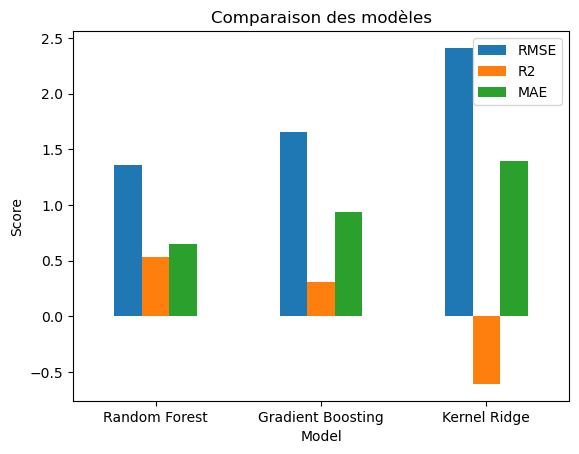

In [183]:
# Liste des modèles à tester
models = [
    ("Random Forest", RandomForestRegressor()),
    ("Gradient Boosting", GradientBoostingRegressor()),
    ("Kernel Ridge", KernelRidge())
]

# Liste des grilles de paramètres à tester pour chaque modèle
params = [
    {"n_estimators": [50, 100, 150], "max_depth": [None, 5, 10]},
    {"n_estimators": [50, 100, 200], "learning_rate": [0.01, 0.1, 0.5], "max_depth": [3, 5, 7]},
    {"alpha": [0.1, 1, 10], "kernel": ['linear', 'rbf']}
]

# Dictionnaire pour stocker les résultats
results = {}

# Fonction de scoring
scoring = {"RMSE": make_scorer(mean_squared_error, squared=False), 
           "R2": make_scorer(r2_score),
           "MAE": make_scorer(mean_absolute_error)}

# Boucle sur les modèles et les paramètres
for i, model in enumerate(models):
    print(f"Testing {model[0]}...")
    clf = GridSearchCV(model[1], params[i], scoring=scoring, refit="RMSE", cv=5)
    clf.fit(X_train, y_train)
    results[model[0]] = {"RMSE": clf.cv_results_["mean_test_RMSE"][clf.best_index_],
                         "R2": clf.cv_results_["mean_test_R2"][clf.best_index_],
                         "MAE": clf.cv_results_["mean_test_MAE"][clf.best_index_]}
    
    # Prédiction sur les données de test
    y_pred = clf.predict(X_test)

    # Affichage des résultats sur les données de test
    print(f"{model[0]} RMSE: {mean_squared_error(y_test, y_pred, squared=False):.2f}")
    print(f"{model[0]} R2: {r2_score(y_test, y_pred):.2f}")
    print(f"{model[0]} MAE: {mean_absolute_error(y_test, y_pred):.2f}\n")

# Création du dataframe pour afficher les résultats
df_results = pd.DataFrame.from_dict(results, orient="index")
df_results.index.name = "Model"

# Affichage du tableau de résultats
print(df_results)

# Affichage des graphiques
df_results.plot(kind="bar", y=["RMSE", "R2", "MAE"])
plt.xticks(rotation=0)
plt.xlabel("Model")
plt.ylabel("Score")
plt.title("Comparaison des modèles")
plt.show()

### 3.3. Tableau recapitulatif de l'ensemble des modèles 

Testing Ridge...
Testing Lasso...
Testing Random Forest...
Testing Gradient Boosting...
Testing Kernel Ridge...


Ill-conditioned matrix (rcond=8.56339e-17): result may not be accurate.
Ill-conditioned matrix (rcond=7.34428e-17): result may not be accurate.
Ill-conditioned matrix (rcond=4.83196e-17): result may not be accurate.


Testing Dummy...
                       RMSE       MAE        R2  \
Model                                             
Ridge              1.499666  0.798352  0.203885   
Lasso              1.542477  0.835466  0.187133   
Random Forest      1.374110  0.664450  0.381886   
Gradient Boosting  1.589649  0.932167  0.265253   
Kernel Ridge       2.308987  1.373220 -0.595542   
Dummy              1.956261  1.016779 -0.104873   

                                                              Params  
Model                                                                 
Ridge                                                 {'alpha': 0.1}  
Lasso                                                  {'alpha': 10}  
Random Forest                   {'max_depth': 5, 'n_estimators': 50}  
Gradient Boosting  {'learning_rate': 0.01, 'max_depth': 3, 'n_est...  
Kernel Ridge                          {'alpha': 10, 'kernel': 'rbf'}  
Dummy                                         {'strategy': 'median'}  


<AxesSubplot:xlabel='R2', ylabel='Model'>

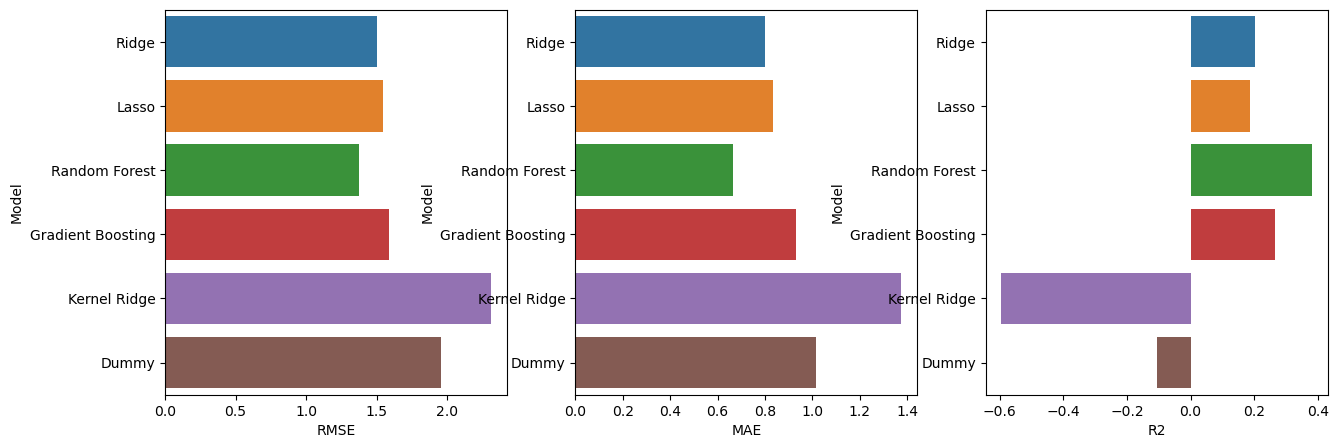

In [184]:
# Liste des modèles à tester
models = [
    ("Ridge", Ridge()),
    ("Lasso", Lasso()),
    ("Random Forest", RandomForestRegressor()),
    ("Gradient Boosting", GradientBoostingRegressor()),
    ("Kernel Ridge", KernelRidge()),
    ("Dummy", DummyRegressor())
]

# Liste des grilles de paramètres à tester pour chaque modèle
params = [
    {"alpha": [0.1, 1, 10]},
    {"alpha": [0.1, 1, 10]},
    {"n_estimators": [50, 100, 150], "max_depth": [None, 5, 10]},
    {"n_estimators": [50, 100, 200], "learning_rate": [0.01, 0.1, 0.5], "max_depth": [3, 5, 7]},
    {"alpha": [0.1, 1, 10], "kernel": ["linear", "rbf"]},
    {"strategy": ["mean", "median"]}
]

# Dictionnaire pour stocker les résultats
results = {}

# Fonctions de scoring
scoring = {"RMSE": make_scorer(mean_squared_error, squared=False),
           "MAE": make_scorer(mean_absolute_error),
           "R2": make_scorer(r2_score)}

# Boucle sur les modèles et les paramètres
for i, model in enumerate(models):
    print(f"Testing {model[0]}...")
    clf = GridSearchCV(model[1], params[i], scoring=scoring, refit="RMSE", cv=5)
    clf.fit(X, y)
    results[model[0]] = {"RMSE": clf.cv_results_["mean_test_RMSE"][clf.best_index_],
                         "MAE": clf.cv_results_["mean_test_MAE"][clf.best_index_],
                         "R2": clf.cv_results_["mean_test_R2"][clf.best_index_],
                         "Params": clf.best_params_}

# Création du dataframe pour afficher les résultats
df_results = pd.DataFrame.from_dict(results, orient="index")
df_results.index.name = "Model"

# Affichage du tableau de résultats
print(df_results)

# Affichage des graphiques de comparaison des modèles
fig, axs = plt.subplots(ncols=3, figsize=(15,5))
sns.barplot(data=df_results, y=df_results.index, x="RMSE", ax=axs[0])
sns.barplot(data=df_results, y=df_results.index, x="MAE", ax=axs[1])
sns.barplot(data=df_results, y=df_results.index, x="R2", ax=axs[2])

<b><font size="3">Remarque </font></b> : Nous constatons que les modèles non linéaires améliorent la performance des modèles linéaires et le meilleur modèle est <b>Random Forest Regressor</b> 

### 3.4. Feature importance avec 'ENERGYSTARScore'

- <b>Feature importance globale</b> 

In [185]:
# Le meilheure model de l'ensemble des modèles utilisés
best_model

RandomForestRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                      n_estimators=50)

In [186]:
# Calcule l'importance de chaque feature (variable) dans le modèle de régression Random Forest
importances = best_model.feature_importances_

In [187]:
# Récupérer les noms de chaque colonne (feature) 
feature_names = X.columns

In [188]:
# Calcule de l'écart-type des importances des différentes variables (features) du modèle
std = np.std([tree.feature_importances_ for tree in best_model.estimators_], axis=0)

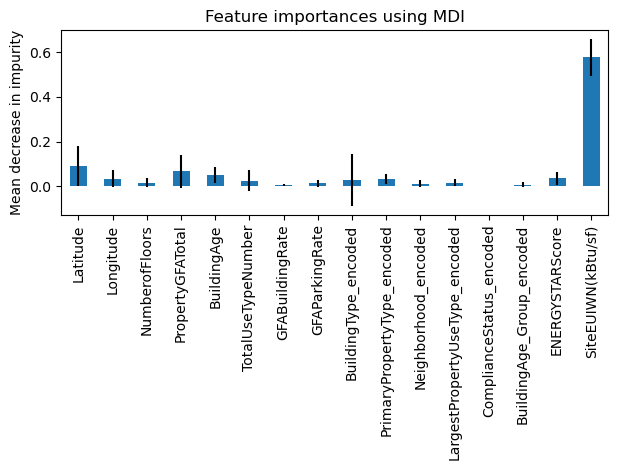

In [189]:
# créer une série pandas contenant les importances de chaque caractéristique
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

- <b>Feature importance locale</b> 

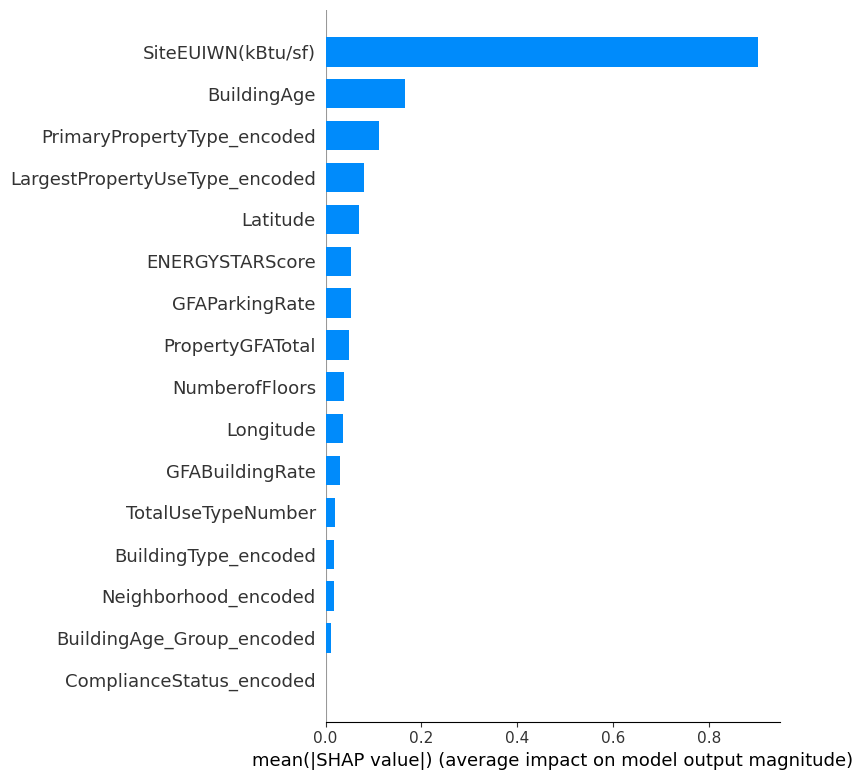

In [190]:
# la contribution de chaque featue à l'ensemble des prédictions du modèle sur l'ensemble de données de test
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)

# Affichage des sommaires SHAP pour chaque caractéristique
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [191]:
# load JS visualization code to notebook
shap.initjs()

L'initialisation de la bibliothèque JavaScript SHAP est nécessaire pour pouvoir afficher les graphiques dans un notebook Jupyter.

In [194]:
i = 1
shap.force_plot(explainer.expected_value, shap_values[i], features=X_test.iloc[i], feature_names=X_test.columns)

Nous avons ci-dessus le diagramme de dispersion SHAP pour une observation donnée (ici l'observation 1), en utilisant la bibliothèque SHAP. Les variables poussant la prédiction vers le haut sont affichées en rouge, celles poussant la prédiction vers le bas sont en bleu.

## 4. Conclusion

Pour les prédictions des émissions de CO2 de bâtiments non destinés à l’habitation, nous pouvons affirmer que les modèles non linéaires sont plus performantes que les modèles linéaires. Le meilleur modèle choisi est <b>Random Forest Regressor</b> qui nous offre les meilleurs performances. Aussi, nous avons constaté que <b>"ENERGY STAR Score"</b> améliore fortement la performance des modèles.